# Tarea Examen 1

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

## Ejercicio 1

Se tiene un oscilador armónico en 2 dimensiones en que la fuerza es $\vec F_{osc} = -k\vec r$ y  se tiene una fricción $\vec f_{fric} = -\gamma \vec{v}$ si $|\vec v| < 1$, pero cuando  $|\vec v| > 1$ la fricción es $\vec f_{fric} = -\mu |\vec v|^{1/2}\vec{v}$. Consideremos una partícula de masa $m=1$ y los parámetros fijos $\gamma = 0.1$ y $\mu=0.2$.

Notemos que la fuerza de fricción se puede escribir de forma general como $\vec f_{fric} = - \alpha |\vec v|^{\beta} \vec {\dot r}$. Donde $\alpha = \{\gamma, \mu\}$ y $\beta = \{0,\frac12\}$



Las ecuaciones de movimiento son:
\begin{align}
m \vec{ \ddot r }&= \vec F_{osc} + \vec f_{fric}\\
\vec{\ddot r} &= -\frac{k}{m} \vec r - \frac{\alpha}{m} |\vec v|^{\beta} \vec {\dot r}
\end{align}

### Coordenadas cartesianas
Escribiendo estas ecuaciones en coordenadas cartesianas tenemos
\begin{align}
\ddot x &= -\frac{k}{m} x - \frac{\alpha}{m} v^{\beta} \dot x\\
\ddot y &= -\frac{k}{m} y - \frac{\alpha}{m} v^{\beta} \dot y
\end{align}

Escrita en forma de sistema de ecuaciones ecuaciones de primer orden tenemos
\begin{align}
\dot x &= u_x\\
\dot y &= u_y\\
\dot u_x &= -\frac{k}{m} x - \frac{\alpha}{m} (u_x^2+u_y^2)^{\beta/2} u_x\\
\dot u_y &= -\frac{k}{m} y - \frac{\alpha}{m} (u_x^2+u_y^2)^{\beta/2} u_y
\end{align}

Con condiciones iniciales dados por
\begin{align}
x_0 &= 0\\
y_0 &= 1\\
u_{x0} &= \cos \theta\\
u_{y0} &= \sin \theta
\end{align}

### Coordenadas polares
Usando las relaciones siguientes:
\begin{align}
\vec r &= r \hat r\\
\vec {\dot r} &= \dot r \hat r + r \dot \theta \hat \theta\\
\vec {\ddot r} &= \ddot r \hat r + 2 \dot r \dot \theta \hat \theta + r \ddot \theta \hat \theta -r \dot \theta ^2 \hat r = ( \ddot r- r \dot \theta^2 ) \hat r + (2 \dot r \dot \theta + r \ddot \theta) \hat \theta
\end{align}

Podemos escribir las ecuaciones de movimiento en coordenadas polares
\begin{align}
\ddot r- r \dot \theta^2 &= - \frac{k}{m} r - \frac{\alpha}{m} (\dot r ^2 + r^2 \dot \theta ^2)^{\beta/2} \dot r\\
r\ddot \theta + 2 \dot r \dot \theta &= -\frac{\alpha}{m} (\dot r ^2 + r^2 \dot \theta^2)^{\beta/2}  r \dot \theta
\end{align}

Por lo tanto se tiene el siguiente sistema de ecuaciones
\begin{align}
\dot r &= v\\
\dot \theta &= \omega\\
\dot v &= r \omega^2- \frac{k}{m} r - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} v\\
\dot \omega &= -2 \frac{v \omega}{r} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} \omega
\end{align}

Con las condiciones iniciales
\begin{align}
r_0 &= 1\\
\theta_0 &= \frac{\pi}{2}\\
v_0 &= \sin \theta\\
\omega_0 &= -\cos \theta
\end{align}

### Propiedades de la partícula
El momento angular de la partícula es 
$$L = r^2 \dot \theta$$

La energía mecánica de la partícula se define como $E = T + V$, por lo tanto
\begin{align}
E_{cart} &= \frac12 m (\dot{x}^2+\dot{y}^2) + \frac12 k (x^2+y^2)\\
E_{polar} &= \frac12 m (\dot{r}^2+r^2\dot \theta^2) + \frac12 k r^2
\end{align}

In [2]:
def Energia(x, args):
    # args[0] = 0 --> cartesianas
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    if args[0] == 0:
        return 0.5*(x[2]*x[2]+x[3]*x[3]) + 0.5*args[1]*(x[0]*x[0]+x[1]*x[1])
    else:
        return 0.5*(x[2]*x[2]+x[0]*x[0]*x[3]*x[3]) + 0.5*args[1]*x[0]*x[0]

# Se define el metodo de integracion
def RK4_1(ec, p_ini, x, h=0.1, args=[0.,1.,0.1,0.2]):
    # args[0] = 0 --> cartesianas
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    # Se calcula la energia del sistema al inicio
    E0 = Energia(p_ini, args)
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
        
        # Se calcula la energia para detener la simulacion si En < 0.01 E0
        En = Energia(sol[i+1,:], args)
        if En < 0.01*E0:
            tiempos = tiempos[:i]
            sol = sol[:i, :]
            return tiempos,sol
        
    return tiempos,sol

# Se define el sistema de ecuaciones diferenciales por resolver para coordenadas cartesianas
def ec_dif1_cart(x, t, args=[0.,1.,0.1,0.2]):
    # args[0] = 0 --> cartesianas
    # args[resto] = k, gamma, mu
    
    v = sqrt(x[2]*x[2]+x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[3]*sqrt(v)*array([x[2],x[3]])
    else:
        f_fric = -args[2]*array([x[2],x[3]])
    
    dux = - args[1]*x[0]+f_fric[0]
    duy = - args[1]*x[1]+f_fric[1]
    return array([x[2], x[3], dux, duy])

# Se define el sistema de ecuaciones diferenciales por resolver para coordenadas polares
def ec_dif1_polar(x, t, args=[1.,1.,0.1,0.2]):
    # args[0] = 1 --> polares
    # args[resto] = k, gamma, mu
    
    v = sqrt(x[2]*x[2]+x[0]*x[0]*x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[3]*sqrt(v)*array([x[2], x[3]])
    else:
        f_fric = -args[2]*array([x[2], x[3]])
    
    dur = x[0]*x[3]*x[3] - args[1]*x[0] + f_fric[0]
    dut = -2.0*x[2]*x[3]/x[0] + f_fric[1]
    
    return array([x[2], x[3], dur, dut])

### Coordenadas cartesianas

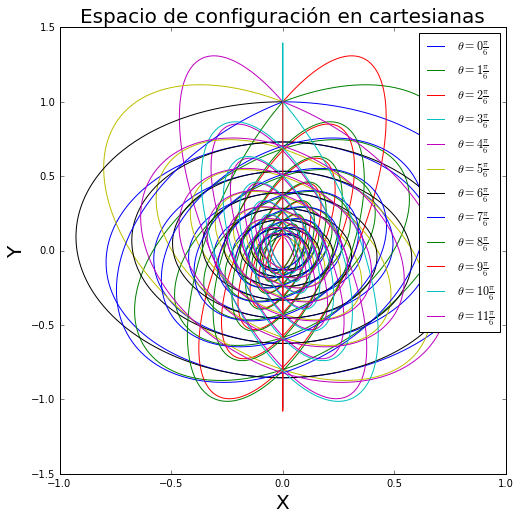

In [3]:
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111)

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    cond_ini = array([0, 1, cos(theta[i]), sin(theta[i])])
    tiempo, sol = RK4_1(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,0], sol[:,1], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    ax.set_xlabel("X", fontsize=20); ax.set_ylabel("Y", fontsize=20)
    ax.set_title(u"Espacio de configuración en cartesianas", fontsize=20)
    ax.legend()

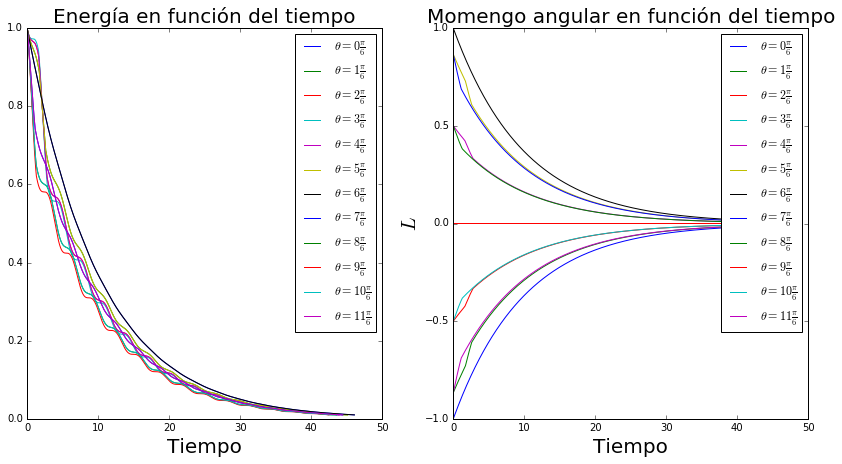

In [4]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    cond_ini = array([0, 1, cos(theta[i]), sin(theta[i])])
    tiempo, sol = RK4_1(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    # Se grafica la energia en funcion del tiempo
    Energies = zeros_like(tiempo)
    for n in range(len(tiempo)): Energies[n] = Energia(sol[n,:], [0,1,0.1,0.2])
    ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    ax.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$E/E_0$", fontsize=20)
    ax.set_title(u"Energía en función del tiempo", fontsize=20)
    ax.legend()
    
    # Se grafica el momento angular en funcion del tiempo
    Mom_angular = zeros_like(tiempo)
    for n in range(len(tiempo)):
        Mom_angular[n] = sol[n,0]*sol[n,3]-sol[n,1]*sol[n,2]
    bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    bx.set_xlabel("Tiempo", fontsize=20); bx.set_ylabel("$L$", fontsize=20)
    bx.set_title(u"Momengo angular en función del tiempo", fontsize=20)
    bx.legend()

### Coordenadas polares

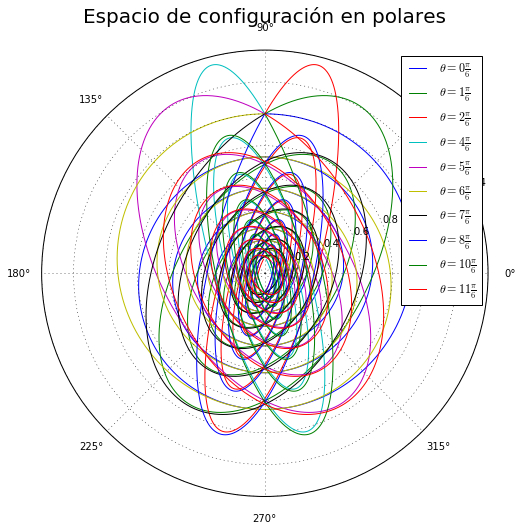

In [5]:
fig = figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='polar')

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    if abs(theta[i]%pi) != pi/2:
        cond_ini = array([1., pi/2., sin(theta[i]), -cos(theta[i])])
        tiempo, sol = RK4_1(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1.,0.1,0.2])

        # Se grafica el espacio de configuracion
        ax.plot(sol[:,1], sol[:,0], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        ax.set_title(u"Espacio de configuración en polares", fontsize=20)
        ax.legend()

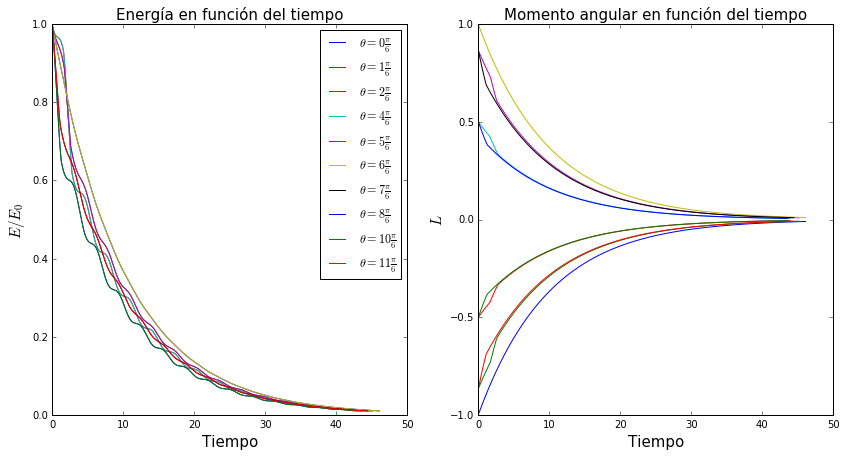

In [6]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

theta = [n*pi/6. for n in range(12)]
N = 70
for i in range(len(theta)):
    if abs(theta[i]%pi) != pi/2:
        cond_ini = array([1., pi/2., sin(theta[i]), -cos(theta[i])])
        tiempo, sol = RK4_1(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1.,0.1,0.2])
        # Se grafica la energia en funcion del tiempo
        Energies = zeros_like(tiempo)
        for n in range(len(tiempo)): 
            Energies[n] = Energia(sol[n,:], [1,1.,0.1,0.2])
        ax.plot(tiempo, Energies, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        ax.set_xlabel("Tiempo", fontsize=15); 
        ax.set_ylabel("$E/E_0$", fontsize=15)
        ax.set_title(u"Energía en función del tiempo", fontsize=15)
        ax.legend()
        
        # Se grafica el momento angular en funcion del tiempo
        Mom_angular = zeros_like(tiempo)
        for n in range(len(Mom_angular)): 
            Mom_angular[n] = sol[n,0]*sol[n,0]*sol[n,3]
        bx.plot(tiempo, Mom_angular, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
        bx.set_xlabel("Tiempo", fontsize=15); 
        bx.set_ylabel("$L$", fontsize=15)
        bx.set_title(u"Momento angular en función del tiempo", fontsize=15)

### Espacios fase

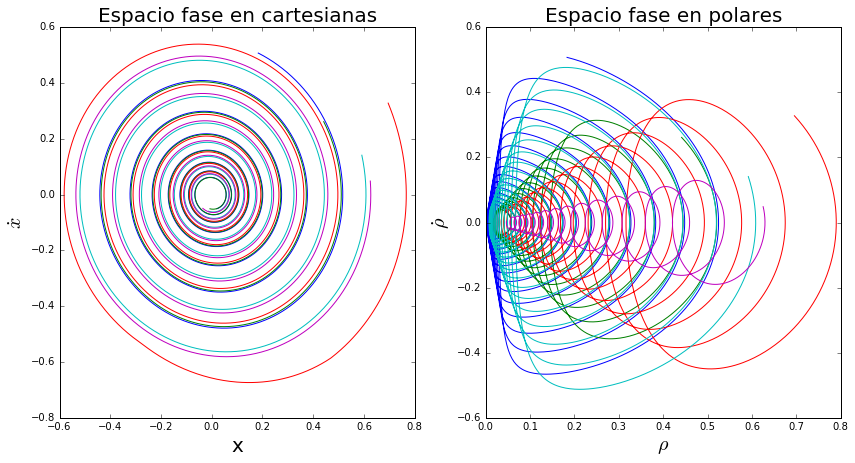

In [7]:
fig = figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

N = 50
for n in range(5):
    cond_ini = [random.rand(),random.nrand(),random.uniform(0,2*pi),random.nrand()]
    tiempo, sol_cart = RK4_1(ec_dif1_cart, cond_ini, [0,N], 0.01, [0,1,0.1,0.2])
    tiempo, sol_polar = RK4_1(ec_dif1_polar, cond_ini, [0,N], 0.01, [1,1,0.1,0.2])

    # Se grafica el espacio de fase en cartesianas
    ax.plot(sol_cart[:,0], sol_cart[:,2])
    ax.set_xlabel("x", fontsize=20); ax.set_ylabel("$\\dot x$", fontsize=20)
    ax.set_title(u"Espacio fase en cartesianas", fontsize=20)

    # Se grafica el espacio de fase en polares
    bx.plot(sol_polar[:,0], sol_polar[:,2])
    bx.set_xlabel("$\\rho$", fontsize=20); bx.set_ylabel("$\\dot \\rho$", fontsize=20)
    bx.set_title(u"Espacio fase en polares", fontsize=20)

## Ejericio 2

Supongamos que tenemos el problema anterior pero ahora la partícula se encuentra cargada y hay una carga del mismo signo en el origen.

El sistema de ecuaciones es el siguiente
\begin{align}
\dot r &= v\\
\dot \theta &= \omega\\
\dot v &= r \omega^2 - \omega_0^2 r -\frac{q^2}{m r^2} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} v\\
\dot \omega &= -2 \frac{v \omega}{r} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} \omega
\end{align}
Donde $\omega_0^2 = \frac{k}{m}$ es la frecuencia del oscilador.

### Sin fricción

Si no concideramos fricción, la partícula está sometida a aun potencial concervativo dado por:
$$ V(r) = \frac12 m \omega_0^2 r^2 - \frac{q^2}{r}$$

Notemos que como el potencial es central, el momento angular total se conserva y por lo tanto se puede considerar que la patícula está en en potencial efectivo dado por
$$ V_{ef}(r) = \frac{l^2}{2m r^2} + V(r) = \frac{l^2}{2m r^2} +\frac12 m \omega_0^2 r^2 - \frac{q^2}{r}$$

Notemos que para $r\approx 0$ y para $r \rightarrow \infty$ el potencial se va a infinito. Por lo que para toda energía permitida, $E \ge min(V_{ef})$, Se tiene una órbita cerrada!

In [8]:
def metodoNewton(func, x_ini, args, h=0.1, epsilon=1e-9):
    while abs(func(x_ini, args)) >= epsilon:
        d_func = (-func(x_ini+2*h, args)+8*func(x_ini+h, args)-8*func(x_ini-h, args)+func(x_ini-2*h, args))/(12*h)
        raiz = x_ini - func(x_ini, args)/d_func
        x_ini = raiz
    return raiz
    
def grad_v_ef(x, args=[1., 1., 1., 1.]):
    #args = [m, omega0, q2, l]
    return args[0]*args[0]*args[1]*args[1]*x*x*x*x+args[0]*args[2]*x-args[3]*args[3]

def V_ef(x, args=[1., 1., 1., 1.]):
    #args = [m, omega0, q2, l]
    return 0.5*args[3]*args[3]/(args[0]*x*x)+0.5*args[0]*args[1]*args[1]*x*x-args[2]/x

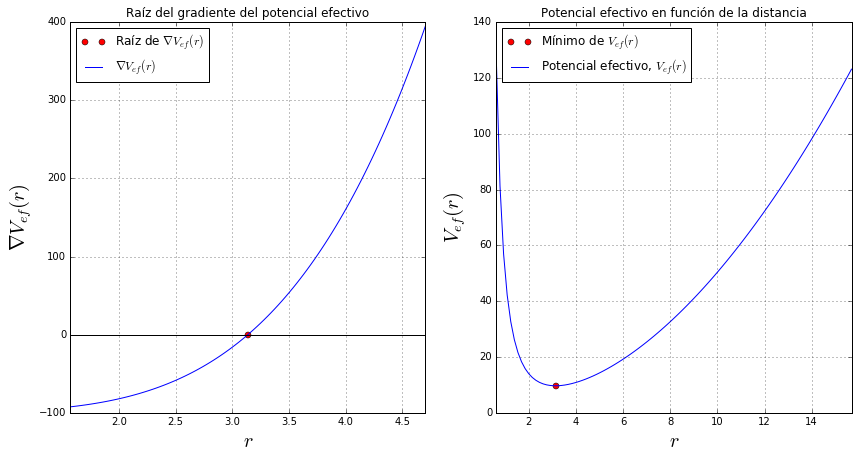

In [9]:
fig = figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

args = [1., 1., 1., 10.]
#args = [m, omega0, q2, l]
r0 = metodoNewton(grad_v_ef, 0.1, args)
r = linspace(0.5*r0,1.5*r0,100)
r_ef = linspace(0.2*r0,5*r0,100)
Grad_V_ef = grad_v_ef(r, args)
V_ef_ = V_ef(r_ef, args)

ax.set_title(u"Raíz del gradiente del potencial efectivo")
ax.plot([r0],[0],'ro', label=u"Raíz de $\\nabla V_{ef}(r)$")
ax.plot(r, Grad_V_ef, label=u"$\\nabla V_{ef}(r)$")
ax.plot(r, zeros_like(r), color='black')
ax.set_xlabel("$r$", fontsize=20)
ax.set_ylabel("$\\nabla V_{ef}(r)$", fontsize=20)
ax.set_xlim(r[0],r[-1])
ax.grid(True)
ax.legend(loc='best')

bx.set_title(u"Potencial efectivo en función de la distancia")
bx.plot([r0], [V_ef(r0, args)], 'ro', label=u"Mínimo de $V_{ef}(r)$")
bx.plot(r_ef, V_ef_, label="Potencial efectivo, $V_{ef}(r)$")
bx.set_xlabel("$r$", fontsize=20)
bx.set_ylabel("$V_{ef} (r)$", fontsize=20)
bx.set_xlim(r_ef[0],r_ef[-1])
bx.grid(True)
bx.legend(loc='best');

El sistema de ecuaciones es el siguiente
\begin{align}
\dot r &= v\\
\dot \theta &= \omega\\
\dot v &= r \omega^2 - \omega_0^2 r -\frac{q^2}{m r^2} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} v\\
\dot \omega &= -2 \frac{v \omega}{r} - \frac{\alpha}{m} (v^2 + r^2 \omega^2)^{\beta/2} \omega
\end{align}
Donde $\omega_0^2 = \frac{k}{m}$ es la frecuencia del oscilador.


In [10]:
## Se define el sistema de ecuaciones diferenciales por resolver para coordenadas polares
def ec_dif2_polar(x, t, args=[1.,1.,1.,0.1,0.2]):
    # args[0] = 1 --> polares
    # args[resto] = m, omega0, q2, gamma, mu
    
    v = sqrt(x[2]*x[2]+x[0]*x[0]*x[3]*x[3])
    # Se determina la fuerza de friccion
    if v >= 1:
        f_fric = -args[-1]*sqrt(v)*array([x[2], x[3]])
    else:
        f_fric = -args[-2]*array([x[2], x[3]])
    
    dur = f_fric[0]/args[1] + x[0]*x[3]*x[3] - args[2]*x[0] - args[3]/(args[1]*x[0]*x[0])
    dut = f_fric[1]/args[1] - 2.0*x[2]*x[3]/x[0]
    
    return array([x[2], x[3], dur, dut])

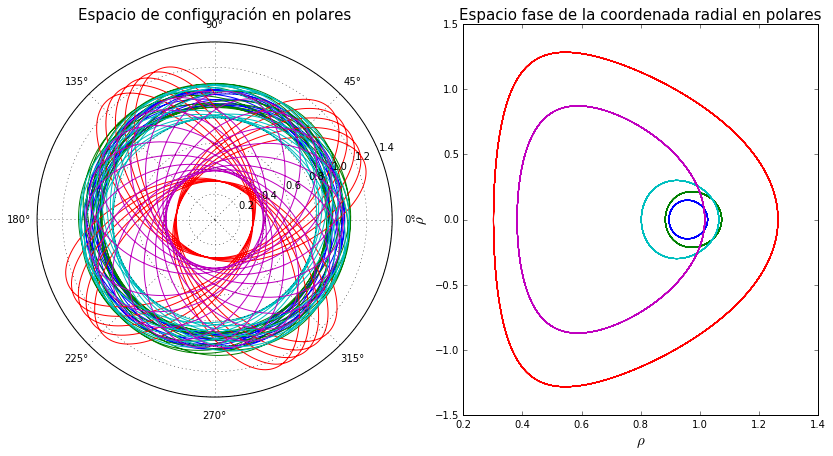

In [11]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 50
for i in range(5):
    cond_ini = array([1., pi/2., random.rand(), 0.5+random.rand()])
    tiempo, sol = RK4_1(ec_dif2_polar, cond_ini, [0,N], 0.005, [1.,1.,1.,1.,0.,0.])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

Como podemos notar en el espacio fase de $\rho$ las órbitas son cerradas.

### Con fricción

Si se incluye fricción al sistema uno esperaría que no hubiera órbitas cerradas ya que la energía mecánica del sistema disminuye. Por lo que para órbitas con radios "grandes", disminuiran el radio de la órbita hasta que la intección de Coulomb tenga un efecto notable. En ese punto el factor $\frac{1}{r^2}$ hará que la órbita "explote".

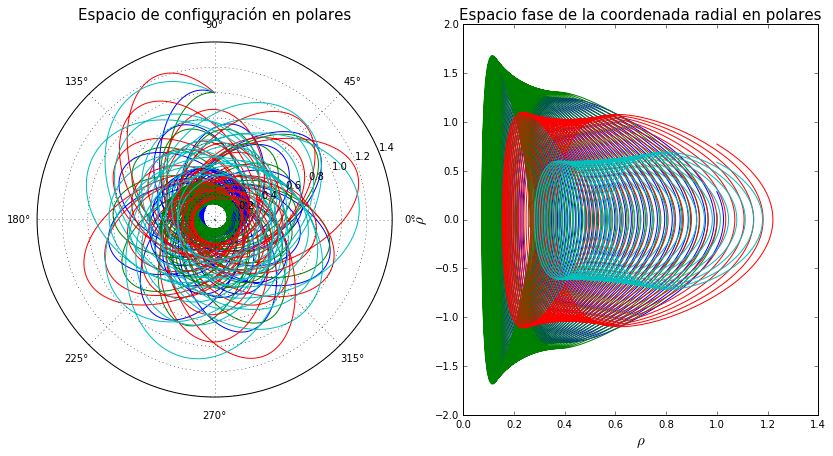

In [13]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 50
for i in range(4):
    cond_ini = array([1., pi/2., random.rand(), 0.5+random.rand()])
    tiempo, sol = RK4_1(ec_dif2_polar, cond_ini, [0,N], 0.005, [1.,1.,1.,1.,0.01,0.01])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

Como podemos ver en el espacio fase de $\rho$ la órbita no es cerrada. Además podemos notar como el sistema evoluciona disminuyendo $\rho$ y aumentando $\dot \rho$.

Si aumentamos el coeficiente de fricción, podemos notar que el sistema se destruye mucho antes.

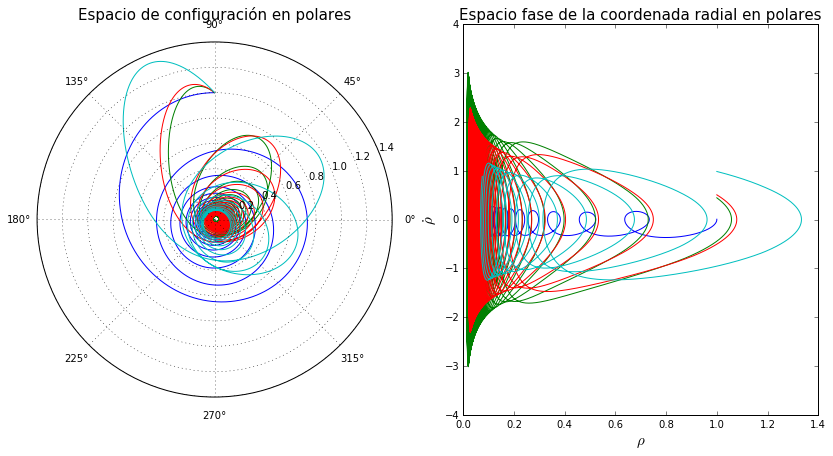

In [14]:
fig = figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)

N = 10
for i in range(4):
    cond_ini = array([1., pi/2., random.rand(), 0.5+random.rand()])
    tiempo, sol = RK4_1(ec_dif2_polar, cond_ini, [0,N], 0.001, [1.,1.,1.,1.,0.,0.1])
    # Se grafica el espacio de configuracion
    ax.plot(sol[:,1], sol[:,0])
    ax.set_title(u"Espacio de configuración en polares", fontsize=15)
    
    # Se grafica el espacio fase
    bx.plot(sol[:,0], sol[:,2])
    bx.set_title(u"Espacio fase de la coordenada radial en polares", fontsize=15)
    bx.set_xlabel("$\\rho$", fontsize=15)
    bx.set_ylabel("$\\dot \\rho$", fontsize=15)

## Ejercicio 3

Se tiene una partícula de masa $m=1$  en un campo gravitacional dado por $\vec g = -9.8 \hat j$ en una caja de longitud $L=10$ y alto $d=3$, en la parte inferior consta de dos rectas con un ángulo $\alpha$ respecto a la norma.


Asumiendo un modelo de fricción las ecuaciones de movimiento del sistema puestas como sistema de ecuaciones son:

\begin{align}
u &= \dot x\\
v &= \dot y\\
\dot u &= -\frac{1}{m} fric(u, v)_x \\
\dot v &= -\frac{1}{m} fric(u, v)_y -g
\end{align}

Notemos que la condicion de rebote en las paredes verticales es equivalente a invertir las velocidad en la componente horizontal, de forma análoga para el techo donde se invierte la componente vertical.

In [2]:
def piso(x,angulo):
    if any(x)<= 0:
        return -tan(angulo)*abs(x)
    else:
        return tan(angulo)*abs(x)

def techo(x,angulo):
    return 5*tan(angulo)*ones_like(x)+3

def pared(pt, angulo):
    a = 5*tan(angulo)
    y = arange(a,a+3,.01)
    x = pt*ones_like(y)
    return array([x,y])

def caja(angulo, ax):
    x = arange(-5,5,.1)
    ang = angulo
    pt_i = x[0]
    pt_f = x[-1]
    
    p = piso(x, ang)
    t = techo(x, ang)
    der = pared(pt_i,ang)
    izq = pared(pt_f,ang)
    
    ax.plot(x,p, x,t, der[0,:],der[1,:], izq[0,:],izq[1,:])

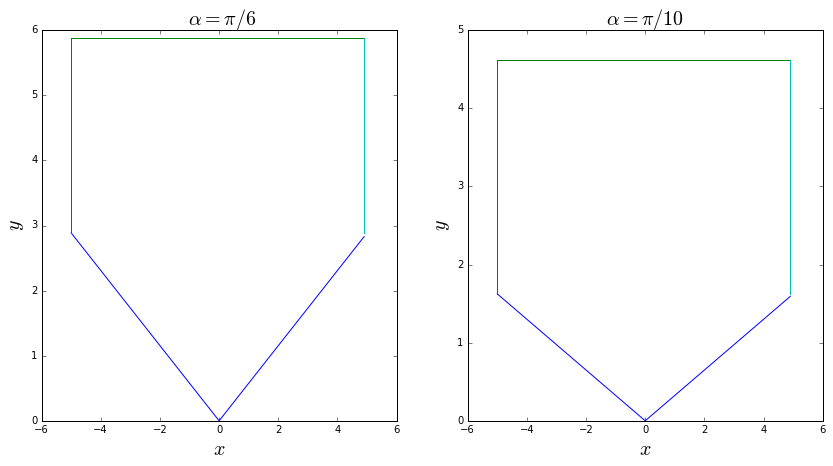

In [3]:
fig = figure(figsize=(14, 7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)

angulos = array([pi/6, pi/10])

ax.set_title(r' $\alpha = \pi/6$',fontsize = 20)
caja(angulos[0], ax)
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)

bx.set_title(r'$\alpha = \pi/10$',fontsize = 20)
caja(angulos[1], bx)
bx.set_xlabel('$x$', fontsize=20)
bx.set_ylabel('$y$', fontsize=20)

In [17]:
def ec_mov_3(r_v,t,fric=0, g=9.8,m=1):
    if fric == 0:
        dvx,dvy = 0,-g
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]/m
        dvy = -g- fric([r_v[2],r_v[3]])[1]/m
    return array([r_v[2],r_v[3],dvx,dvy])

# Se define el metodo de integracion
def RK4_3(ec, p_ini, x, h=0.1, args=[]):
    if (x[1]-x[0])<10*h:
        h = 0.01*h
    
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i], args)
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h, args)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h, args)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h, args)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

In [18]:
def RebotePared(trayectoria, pt, e_mov, fric, mi_dt):
    dt_busqueda = mi_dt/2
    y_izq = trayectoria
    
    t, sol = RK4_3(e_mov, trayectoria, [0, dt_busqueda], args=fric)
    y_med = sol[-1,:]
    
    while abs(y_izq[0]-pt) > 1e-5:
        if (y_izq[0]-pt)*(y_med[0]-pt) < 0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = RK4_3(e_mov, reinicio, [0,dt_busqueda], args=fric)
        y_izq = reinicio
        y_med = sol[-1,:]
        
    y_izq[2] *= -1
    return y_izq


def ReboteTecho(trayectoria, ang, e_mov, fric, mi_dt):
    dt_busqueda = mi_dt/2
    y_izq = trayectoria
    
    t, sol = RK4_3(e_mov, trayectoria, [0, dt_busqueda], args=fric)
    y_med = sol[-1,:]
    
    while abs(y_izq[1]-(5*tan(angulo)+3)) > 1e-5:
        if (y_izq[1]-(5*tan(angulo)+3))*(y_med[1]-(5*tan(angulo)+3)) < 0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = RK4_3(e_mov, reinicio, [0,dt_busqueda], args=fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    
    y_izq[3] *= -1
    return y_izq

def RebotePiso(trayectoria, ang, e_mov, fric, mi_dt):
    dt_busqueda = mi_dt/2.
    y_izq = trayectoria
    
    t, sol = RK4_3(e_mov, trayectoria, [0, dt_busqueda], args=fric)
    y_med = sol[-1,:]
    
    if y_izq[0]<=0:
        while abs(y_izq[1]/y_izq[1]+tan(ang)) > 1e-5:
            if (y_izq[1]/y_izq[1]+tan(ang))*(y_med[1]/y_med[1]+tan(ang)) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t, sol = RK4_3(e_mov, reinicio, [0,dt_busqueda], args=fric)
            y_izq = reinicio
            y_med = sol[-1,:]
        
        y_izq[2] = y_izq[2]*cos(2*ang)-y_izq[3]*sin(2*ang)
        y_izq[3] = -y_izq[3]*cos(2*ang)-y_izq[2]*sin(2*ang)
        
    else:
        while abs(y_izq[1]/y_izq[1]-tan(ang)) > 1e-5:
            if (y_izq[1]/y_izq[1]-tan(ang))*(y_med[1]/y_med[1]-tan(ang)) < 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t, sol = RK4_3(e_mov, reinicio, [0,dt_busqueda], args=fric)
            y_izq = reinicio
            y_med = sol[-1,:]
            
        y_izq[2] = y_izq[2]*cos(2*ang)+y_izq[3]*sin(2*ang)
        y_izq[3] = -y_izq[3]*cos(2*ang)+y_izq[2]*sin(2*ang)
    return y_izq

In [19]:
def trayectoria(e_mov, N, p, angulo, fric, mi_dt=0.1):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        # se resuelve la ecuacion de movimiento en un delta t
        t, sol = RK4_3(e_mov,trayectoria[i,:],[0,mi_dt],args=fric)

        # si la solucion esta por debajo del radio a
        if sol[-1,0] < -5:
            trayectoria[i+1,:] = RebotePared(trayectoria[i], -5, e_mov, fric, mi_dt)
            
        elif sol[-1,0] > 5:
            trayectoria[i+1,:] = RebotePared(trayectoria[i], 5, e_mov, fric, mi_dt)
            
        elif sol[-1,0] < 5*tan(angulo)+3:
            trayectoria[i+1,:] = ReboteTecho(trayectoria[i], angulo, e_mov, fric, mi_dt)
            
        elif sol[-1,1] < piso(sol[-1,0],angulo):
            trayectoria[i+1,:] = RebotePiso(trayectoria[i], angulo, e_mov, fric, mi_dt)
            
        else:
            # si aun no pasa la recta donde rebota pues continua con el calculo de la trayectoria
            trayectoria[i+1,:] = sol[-1,:]
            
            
    fig = figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    caja(angulo, ax)
    ax.plot(trayectoria[:,0],trayectoria[:,1],'.r')

In [23]:
p = [4, 4, 2, 2]
angulo = pi/6.
fric = 0
N = 2
trayectoria(ec_mov_3, N, p, angulo, fric, mi_dt=0.01)

KeyboardInterrupt: 

## Ejercicio 4

Se tiene una particula de masa $m=1$ en una caja en forma de anillo donde el radio interno es $a$ y el radio externo es $b=2a$.

In [4]:
# Se defina la ecuacion diferencial por resolver, particula libre
def ec_mov_4(x, t):
    return array([x[2],x[3],0,0])

# Se define el metodo de integracion
def RK4(ec, p_ini, x, h=0.1):
    if (x[1]-x[0])<10*h:
        h = 0.01*h

    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

In [86]:
def trayectoria(e_mov, N, p, limab, mi_dt=0.1):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        # se resuelve la ecuacion de movimiento en un delta t
        t, sol = RK4(e_mov,trayectoria[i,:],[0,mi_dt])

        # si la solucion esta por debajo del radio a
        
        if sqrt(sol[-1,0]*sol[-1,0]+sol[-1,1]*sol[-1,1]) < limab[0]:
            # se refina el paso temporal para buscar donde debe de rebotar
            dt_busqueda = mi_dt/2.
            # se calcula el la trayectoria desde el punto anterior dt_busqueda
            r_izq = trayectoria[i,:]
            t, solu = RK4(e_mov, trayectoria[i,:], [0.,dt_busqueda])
            r_med = solu[-1,:]

            # se repite el proceso hasta que se encuenta el punto de rebote
            while abs(sqrt(r_izq[0]*r_izq[0]+r_izq[1]*r_izq[1]) - limab[0]) > 1e-4:
                # se refina el paso temporal
                dt_busqueda = dt_busqueda/2

                # se determina en que intervalo temporal ocurrio el rebote
                if (sqrt(r_izq[0]*r_izq[0]+r_izq[1]*r_izq[1]) - limab[0])*(sqrt(r_med[0]*r_med[0]+r_med[1]*r_med[1]) - limab[0]) < 0:
                    reinicio = r_izq
                else:
                    reinicio = r_med
                r_izq = reinicio
                # se calcula la nueva trayectoria
                t, sol_1 = RK4(e_mov, reinicio, [0,dt_busqueda])
                r_med = sol_1[-1,:]
                
            # se ponen las condiciones de rebote
            ang = arctan2(r_izq[1],r_izq[0])-pi/2.
            r_izq[2] = r_izq[2]*cos(2*ang)+r_izq[3]*sin(2*ang)
            r_izq[3] = -r_izq[3]*cos(2*ang)+r_izq[2]*sin(2*ang)
            
            trayectoria[i+1,:] = r_izq
            
        # si la solucion esta por encima del radio b
        elif sqrt(sol[-1,0]*sol[-1,0]+sol[-1,1]*sol[-1,1]) > limab[1]:
            # se refina el paso temporal para buscar donde debe de rebotar
            dt_busqueda = mi_dt/2.
            # se calcula el la trayectoria desde el punto anterior dt_busqueda
            r_izq = trayectoria[i,:]
            t, solu = RK4(e_mov, trayectoria[i,:], [0,dt_busqueda])
            r_med = solu[-1,:]
            # se repite el proceso hasta que se encuenta el punto de rebote
            while abs(sqrt(r_izq[0]*r_izq[0]+r_izq[1]*r_izq[1]) - limab[1]) > 1e-4:
                # se refina el paso temporal
                dt_busqueda = dt_busqueda/2

                # se determina en que intervalo temporal ocurrio el rebote
                if (sqrt(r_izq[0]*r_izq[0]+r_izq[1]*r_izq[1]) - limab[1])*(sqrt(r_med[0]*r_med[0]+r_med[1]*r_med[1]) - limab[1]) < 0:
                    reinicio = r_izq
                else:
                    reinicio = r_med
                
                r_izq = reinicio
                # se calcula la nueva trayectoria
                t, sol_1 = RK4(e_mov, reinicio, [0,dt_busqueda])
                r_med = sol_1[-1,:]
                
            ang = arctan2(r_izq[1],r_izq[0])-pi/2.
            # se ponen las condiciones de rebote
            r_izq[2] = r_izq[2]*cos(2*ang)+r_izq[3]*sin(2*ang)
            r_izq[3] = -r_izq[3]*cos(2*ang)+r_izq[2]*sin(2*ang)
            trayectoria[i+1,:] = r_izq
            
        else:
            # si aun no pasa la recta donde rebota pues continua con el calculo de la trayectoria
            trayectoria[i+1,:] = sol[-1,:]
            
    r = sqrt(trayectoria[:,0]*trayectoria[:,0]+trayectoria[:,1]*trayectoria[:,1])
    
    fig = figure(figsize=(14,7))
    ax = fig.add_subplot(121)
    bx = fig.add_subplot(122)
    
    theta = linspace(0,2*pi,100)
    ax.plot(limab[0]*cos(theta), limab[0]*sin(theta))
    ax.plot(limab[1]*cos(theta), limab[1]*sin(theta))
    
    ax.plot(trayectoria[:,1],trayectoria[:,0],'r')
    ax.set_xlim(-limab[1], limab[1])
    ax.set_ylim(-limab[1], limab[1])
    
    bx.plot(r,'r')
    bx.set_xlabel("Pasos")
    bx.set_ylabel("$r(t)$", fontsize=20)
    bx.set_ylim(0.95, 2.05)

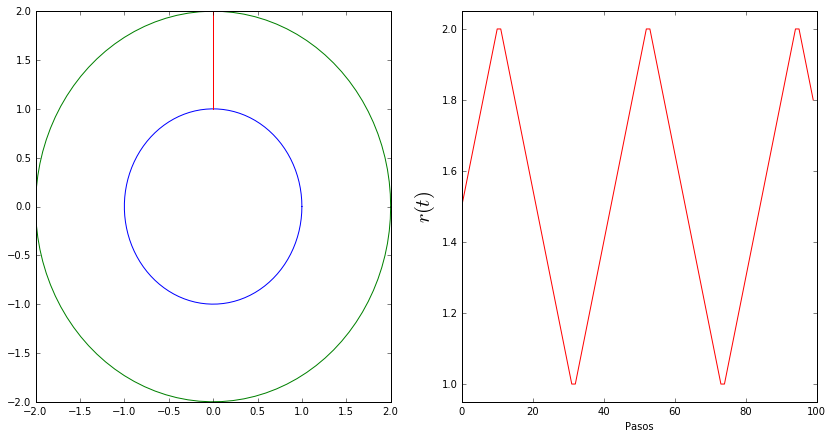

In [87]:
p = [1.5, 0., 0.5, 0.]
N = 100
trayectoria(ec_mov_4, N, p, array([1,2]), mi_dt = 0.1)

Si existen condiciones para las que la partícula se queda en sólo un sector de la caja, cuando la velocidad angular de la partícula es cero, la partícula se queda rebotando sobre los mismos puntos.